# CS155 Project 3 Hidden Markov Models
In this notebook, we generate poems using HMMs.

## Functions

In [1]:
import pickle
import pandas as pd
import re
import WilliamHMM as willh
import HMM_helper as hmmh
from IPython.display import HTML
import heapq
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def LoadHMM(filename):
    pkl_file = open(filename,'rb')
    varout = pickle.load(pkl_file)
    pkl_file.close()
    return varout

def LoadHMMs():
    hidden_states = [4,8,16]
    words_hmms = []
    syls_hmms = []
    syls_p_hmms = []
    for hstate in hidden_states:
        words_hmms.append(LoadHMM('hmms/words_hmm'+str(hstate)+'.pkl'))
        syls_hmms.append(LoadHMM('hmms/syllables_hmm'+str(hstate)+'.pkl'))
        syls_p_hmms.append(LoadHMM('hmms/syllables_with_punct_hmm'+str(hstate)+'.pkl'))
    return words_hmms,syls_hmms,syls_p_hmms

def GetSyllablesDict():
    df = pd.read_csv('data/Syllable_dictionary.txt',header=None)
    df_vals = df.values
    syl_dic = {}
    syl_dic_E = {}
    for val in df_vals:
        dics = val[0].split()
        if len(dics) == 2:
            syl_dic[re.sub(r'[^\w]','',dics[0])] = int(dics[1])
        elif len(dics) == 3:
            try:
                syl_dic[re.sub(r'[^\w]','',dics[0])] = int(dics[2])
                eIDX = 1
            except:
                syl_dic[re.sub(r'[^\w]','',dics[0])] = int(dics[1])
                eIDX = 2
            syl_dic_E[re.sub(r'[^\w]','',dics[0])] = int(dics[eIDX].strip('E'))
    return syl_dic,syl_dic_E

def GeneratePoem(hmm,words_map,wordsIDX=True):
    puncts = [",",".",":","?","!","'",";",")","("," ","\n"]
    text = hmmh.sample_sentence(hmm,words_map,n_words=1000).split()
    Nsyl = 0
    Nlines = 0
    istart = 0
    poem = []
    for i in range(len(text)):
        word = text[i]
        if wordsIDX == True:
            if Nsyl >= 6:
                try:
                    Nsyl += syl_dic_E[word.lower()]
                except:
                    Nsyl += syl_dic[word.lower()]
            else:
                Nsyl += syl_dic[word.lower()]
        else:
            if word not in puncts:
                Nsyl +=1
        if Nsyl >= 10:
            Nlines += 1
            if Nlines >= 13:
                poem.append('(#syllables = '+str(Nsyl)+') '+'  '+' '.join(text[istart:i+1]).capitalize())
            else:
                poem.append('(#syllables = '+str(Nsyl)+') '+' '.join(text[istart:i+1]).capitalize())                              
            istart = i+1
            Nsyl = 0
        if Nlines == 14:
            print('\n'.join(poem)+'\n')
            break
    pass

## Load trained HMMs, maps, and wordclouds

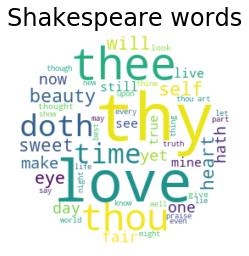

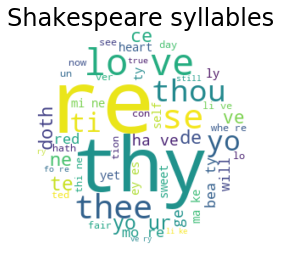

In [2]:
words_hmms,syls_hmms,syls_p_hmms = LoadHMMs()
will = willh.Williamhmm()
words_map = will.words_map
syls_map = will.syls_map
syls_p_map = will.syls_p_map
wordcloud = hmmh.text_to_wordcloud(will.text_words,title='Shakespeare words')
syllablecloud = hmmh.text_to_wordcloud(will.text_syls,title='Shakespeare syllables')

## Obtain syllables dictionary

In [3]:
syl_dic,syl_dic_E = GetSyllablesDict()

## Generate poems using word-based HMMs

In [16]:
Nstates = [4,8,16]
s = 0
for hmm in words_hmms:
    print('################## word-based HMM (#states = '+str(Nstates[s])+') ##################')
    GeneratePoem(hmm,words_map)
    s += 1

################## word-based HMM (#states = 4) ##################
(#syllables = 12) Alive penury hides bristly posterity
(#syllables = 11) Unswept defeat forsaken honest speechless
(#syllables = 10) Breathed usest wandrest featureless require
(#syllables = 10) Sympathized commit seldom forced fulness spur
(#syllables = 10) Robe plods us breathed coming madding rite thing
(#syllables = 10) Constancy reeks smells shames virtuous story slight
(#syllables = 11) Ear meetness merchandized strains unthrift metre
(#syllables = 10) Anew bravry widow powers neglected
(#syllables = 10) Widow shines respect receivest back teach
(#syllables = 10) With imperfect vision truant forbear
(#syllables = 12) Indigest anew mortal painting unmoved
(#syllables = 10) Bail vulgar starved faculty buy rhyme
(#syllables = 10)   Scarcely cheap fled strongly decays barren
(#syllables = 10)   Feeds mercy coward fair judgement seconds

################## word-based HMM (#states = 8) ##################
(#syllables = 1

## Generate poems using syllable-based HMMs

In [32]:
s = 0
for hmm in syls_hmms:
    print('################## syllable-based HMM (#states = '+str(Nstates[s])+') ##################')
    GeneratePoem(hmm,syls_map,wordsIDX=False)
    s += 1

################## syllable-based HMM (#states = 4) ##################
(#syllables = 10) Buds dness claims hful bout free ca ground bath fring
(#syllables = 10) Tien ties rupt bail bow servst phoe tas it we
(#syllables = 10) Why rai sion hung dig thral rio xe cu tys
(#syllables = 10) Bud wolf cen poets drous rents quen slain keen gildst
(#syllables = 10) Friends roof rit gait yet soun hmost shall dom tions
(#syllables = 10) Map smea tsoe tru ha slept towst vow lis show
(#syllables = 10) Ear hou ruth pes hers fers forth ding bad tient
(#syllables = 10) Dost af can au vants bysm rying gains lion poets
(#syllables = 10) Bring found wri hang lac bell rup breach crying bird
(#syllables = 10) Dreams hadst taught tru worth being spea hres ju burt
(#syllables = 10) Mes drest sit servst claims dver bier cree cri big
(#syllables = 10) Clear truth ment in deed saw gli flies count mer
(#syllables = 10)   This drugs joy said lan sap tled hold sweet bsen
(#syllables = 10)   Wish nu unt den fier cian

## Generate poems using syllable-based HMMs with punctuation

In [34]:
s = 0
for hmm in syls_p_hmms:
    print('\n','############ syllable-based HMM with punctuation (#states = '+str(Nstates[s])+') ############')
    GeneratePoem(hmm,syls_p_map,wordsIDX=False)
    s += 1


 ############ syllable-based HMM with punctuation (#states = 4) ############
(#syllables = 10) Zers heard rying break un foul clay wronk drud ford
(#syllables = 10) Noon cing jacks ses gain strai seth terc wi mies
(#syllables = 10) Good los dyed tu fart rich sing mind ghas tat
(#syllables = 10) Ot rel ru speak quen heard tous spends whoe gol
(#syllables = 10) Cast cloy breast tworn cle land gment brings thus wha
(#syllables = 10) Must walks cea boun outs vir unt ha di dies
(#syllables = 10) Gins walks brain fall nis cess down jes way twixt
(#syllables = 10) Gay morn lit sion crus pic pli bless kind pent
(#syllables = 10) Hymns roof lu tless fic outs val ked mits pli
(#syllables = 10) Shea cau flown poor blic pia groun flee knit hor
(#syllables = 10) Net bor fee ran strong fu tor dain trial mour
(#syllables = 10) Uth orp pied world gurs cool bo pli the hap
(#syllables = 10)   Lien count weeks cools sworn ars due ban stern trans
(#syllables = 10)   Dar tual cheeks hen ron die cast ni ce

## Visualize states and transitions for #states = 8

################## word-based HMM (#states = 8) ##################


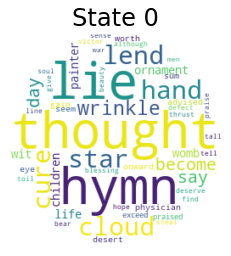

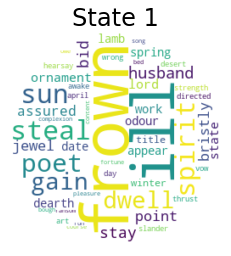

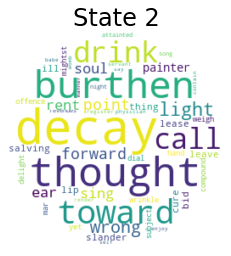

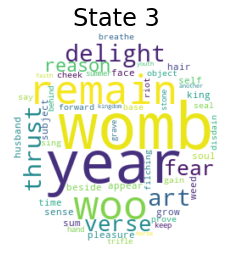

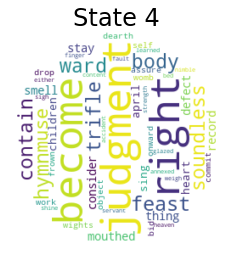

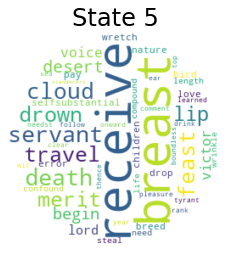

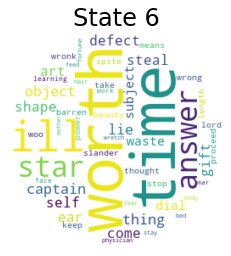

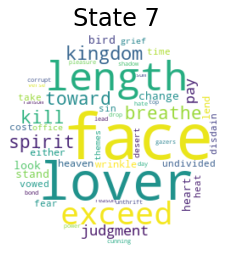


Animating...


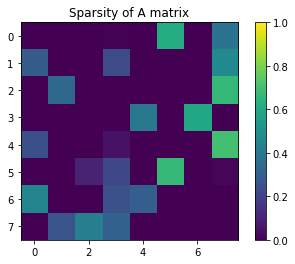

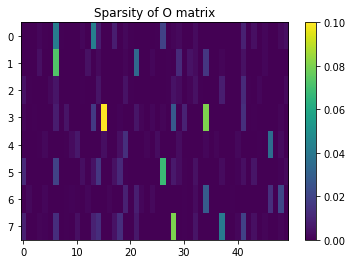

In [22]:
print('################## word-based HMM (#states = 8) ##################')
word_states_clouds, sentences = hmmh.states_to_wordclouds(words_hmms[1],words_map)
anim = hmmh.animate_emission(words_hmms[1],words_map)
HTML(anim.to_html5_video())
hmmh.visualize_sparsities(words_hmms[1], O_max_cols=50)

################## syllable-based HMM (#states = 8) ##################


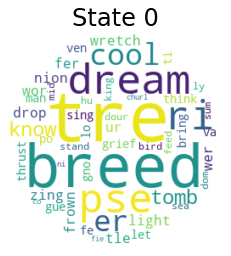

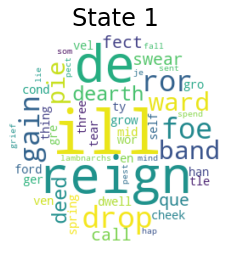

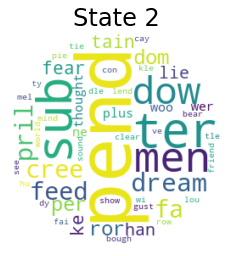

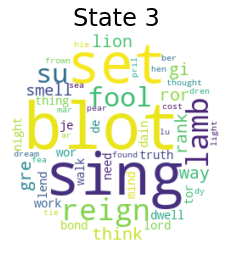

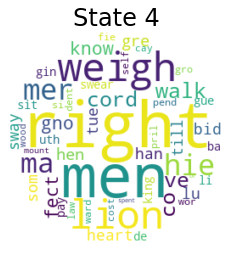

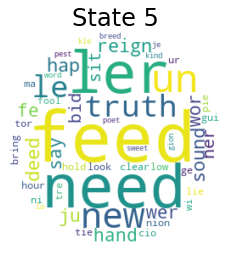

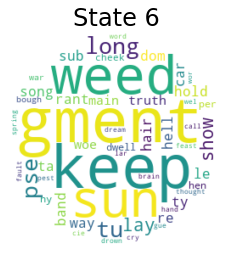

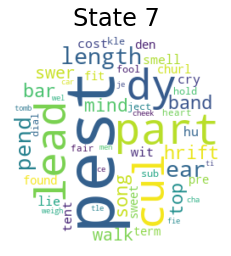


Animating...


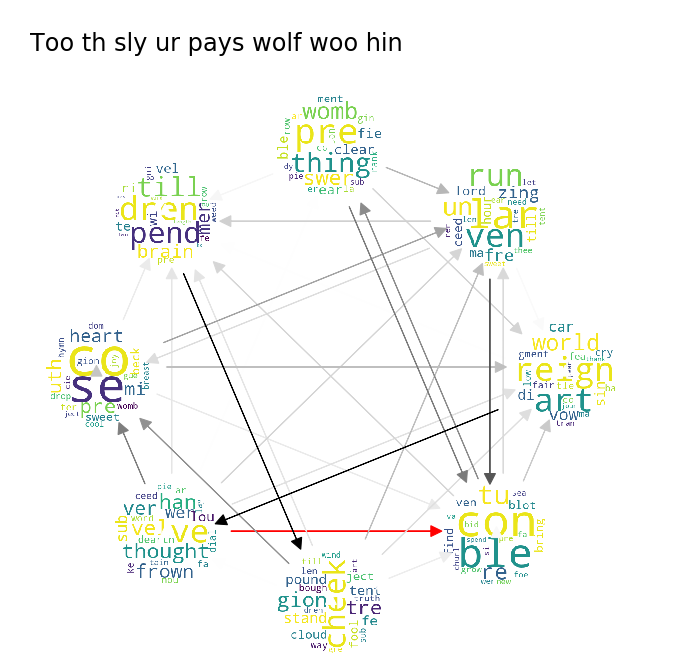

In [68]:
print('################## syllable-based HMM (#states = 8) ##################')
syl_states_clouds, sentences = hmmh.states_to_wordclouds(syls_hmms[1],syls_map)
anim = hmmh.animate_emission(syls_hmms[1],syls_map)
HTML(anim.to_html5_video())

(#syllables = 10) Wert woo falls servant paid quill strive dote learned
(#syllables = 10) Sympathized drowns mine delivered saturn
(#syllables = 12) End from unkind often fleetst titles ordering
(#syllables = 12) Reign drawn rearward impair five try selfexample
(#syllables = 10) This fading counting betray makes oerworn
(#syllables = 10) Dearest confound survey dregs curls yore own
(#syllables = 10) Crossed curse aside rebel badness goodly
(#syllables = 11) Fulfil tibey works decembers wet expiate
(#syllables = 10) Break creation crushed rack removed lusty
(#syllables = 11) Afar both hence declines years hideous curious
(#syllables = 10) Steel twenty leese anothers lays wealth bark
(#syllables = 10) Ay nay death nor exceeds paper foison
(#syllables = 12)   Pleasing wet moods each forget thither importune
(#syllables = 11)   Transfix endowed define act wooed importune

################## word-based HMM after 1000 iterations (#states = 8) ##################


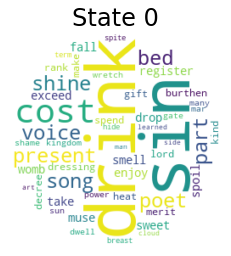

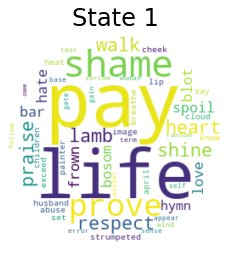

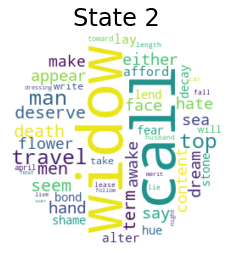

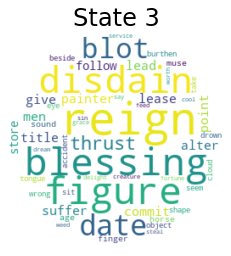

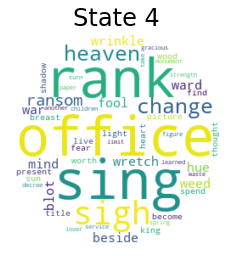

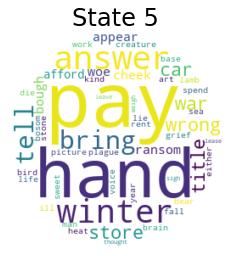

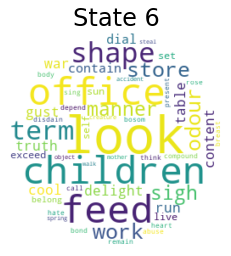

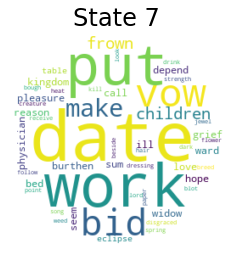


Animating...


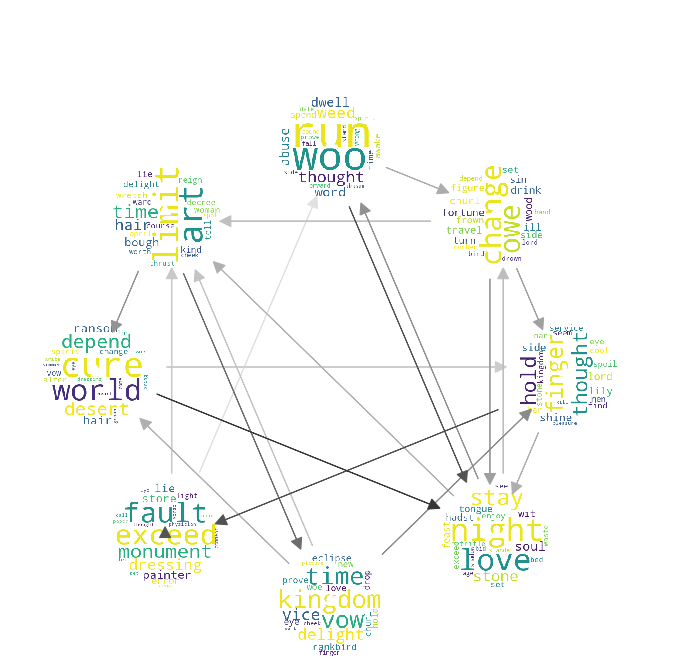

In [18]:
hmm8 = LoadHMM('hmms/words_hmm8_1000.pkl')
GeneratePoem(hmm8,words_map)
print('################## word-based HMM after 1000 iterations (#states = 8) ##################')
states_clouds, sentences = hmmh.states_to_wordclouds(hmm8,words_map)
anim = hmmh.animate_emission(hmm8,words_map)

## State transition and observation matrices, words in a wordcloud for each state

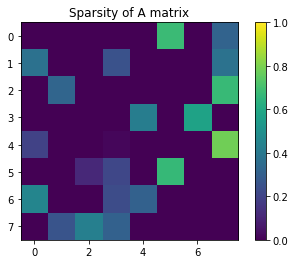

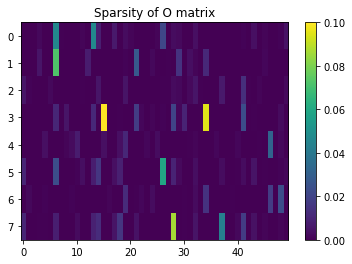

{'hue': 1.0, 'subject': 1.0, 'sense': 1.0, 'tomb': 0.9642857142857143, 'course': 0.9642857142857143, 'compound': 0.9285714285714286, 'bear': 0.9285714285714286, 'second': 0.8571428571428571, 'part': 0.8214285714285714, 'verse': 0.8214285714285714, 'see': 0.8214285714285714, 'year': 0.8214285714285714, 'lend': 0.8214285714285714, 'put': 0.8214285714285714, 'fool': 0.8214285714285714, 'servant': 0.7857142857142857, 'lease': 0.7857142857142857, 'mind': 0.7857142857142857, 'star': 0.7857142857142857, 'womb': 0.7857142857142857, 'breathe': 0.7857142857142857, 'new': 0.7857142857142857, 'date': 0.7857142857142857, 'wit': 0.75, 'art': 0.75, 'word': 0.75, 'husband': 0.75, 'pay': 0.75, 'bid': 0.75, 'poet': 0.75, 'odour': 0.75, 'war': 0.75, 'gift': 0.75, 'sweet': 0.75, 'run': 0.75, 'victor': 0.75, 'cool': 0.75, 'become': 0.75, 'many': 0.7142857142857143, 'blessing': 0.7142857142857143, 'horse': 0.7142857142857143, 'shadow': 0.7142857142857143, 'reign': 0.7142857142857143, 'burthen': 0.7142857142

In [15]:
hmmh.visualize_sparsities(hmm8,O_max_cols=50)
print(states_clouds[0].words_)
print(states_clouds[1].words_)
print(states_clouds[2].words_)
print(states_clouds[3].words_)
print(states_clouds[4].words_)
print(states_clouds[5].words_)
print(states_clouds[6].words_)
print(states_clouds[7].words_)